In [25]:
from iads.data_traitement import traitement
from iads.nlp import preprocessing

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# I. Chargement des données :

In [7]:
df_jeux_up = pd.read_csv("../data/details_clean.csv")

In [8]:
df_avis_up = pd.read_csv("../data/avis_clean.csv")

# II. Prédiction du cluster à partir de la description

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
#import spacy
#import fr_core_news_md
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()

nltk.download('stopwords')
stopwords_list = stopwords.words('french')
stopwords_list.extend(['jeu','joueur','a','plus'])

def preprocess(text):
    text=text.lower()
    text=stemmer.stem(text)
    #nlp = fr_core_news_md.load()
    #doc = nlp(str(text))
    #text=" ".join([token.lemma_ for token in doc])
    return text

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words=stopwords_list,preprocessor=preprocess, ngram_range=(1,2))

vectors = vectorizer.fit_transform(df_jeux_up['description'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mathilde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=0, max_iter=10).fit(vectors)
clusters=kmeans.cluster_centers_
vector=vectorizer.get_feature_names_out(df_jeux_up['description'])

print("Mot le plus important pour chaque cluster : ")
for ind in range(20):
    print('Cluster ',ind,' --------> ',vector[np.argmax(clusters[ind])])


Mot le plus important pour chaque cluster : 
Cluster  0  -------->  extension
Cluster  1  -------->  aucune description
Cluster  2  -------->  pions
Cluster  3  -------->  joueurs
Cluster  4  -------->  héros
Cluster  5  -------->  cartes
Cluster  6  -------->  guerre
Cluster  7  -------->  cliquant
Cluster  8  -------->  the
Cluster  9  -------->  tuiles
Cluster  10  -------->  animaux
Cluster  11  -------->  pièces
Cluster  12  -------->  version
Cluster  13  -------->  questions
Cluster  14  -------->  case
Cluster  15  -------->  simulation
Cluster  16  -------->  figurines
Cluster  17  -------->  casse
Cluster  18  -------->  cartes
Cluster  19  -------->  essen


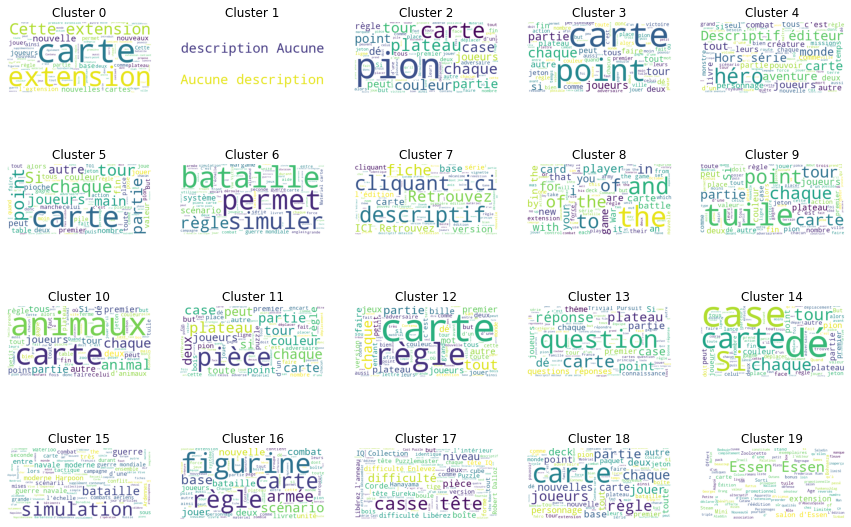

In [87]:

from wordcloud import WordCloud

data = np.array(df_jeux_up['description'])
classes=np.unique(kmeans.labels_)
pred = kmeans.predict(vectors)
plt.figure(figsize=(15,10))

for i in classes :
    ind = np.where(pred==classes[i])
    corpus_tmp = "".join(data[ind])
    wordcloud = WordCloud(background_color='white', stopwords = stopwords_list, max_words=100).generate(corpus_tmp)
    plt.subplot(4, 5,i+1)
    plt.imshow(wordcloud)
    plt.title('Cluster '+str(i))
    plt.axis('off')
plt.show()

Certains jeux n'ont pas de description mais à place d'un Nan, on a "aucune description" (les compter).\
Certains jeux ont une description en anglais et ça va être compliqué de trouver lesquels

In [123]:
#Nombre de jeux sans description. A remplacer par des NaN?
print('Nombre de jeux sans description :')
len(df_jeux_up.index[df_jeux_up['description'].str.contains('Aucune description')].tolist())


Nombre de jeux sans description :


1857

In [122]:
df_jeux_up.index[df_jeux_up['description'].str.contains('player')].tolist()
df_jeux_up['description'][257]

"\n                      Brass: Lancashire — first published as Brass — is an economic strategy game that tells the story of competing cotton entrepreneurs in Lancashire during the industrial revolution. You must develop, build, and establish your industries and network so that you can capitalize demand for iron, coal and cotton. The game is played over two halves: the canal phase and the rail phase. To win the game, score the most victory points (VPs), which are counted at the end of each half. VPs are gained from your canals, rails, and established (flipped) industry tiles. Each round, players take turns according to the turn order track, receiving two actions to perform any of the following:\n\nBuild an industry tile\nBuild a rail or canal\nDevelop an industry\nSell cotton\nTake a loan\nAt the end of a player's turn, they replace the two cards they played with two more from the deck. Turn order is determined by how much money a player spent on the previous turn, from lowest spent fi